In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [23]:
# creating empty reviews list 
oneplus_reviews=[]

In [24]:
for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/OnePlus-Display-Storage-4000mAH-Battery/product-reviews/B07HGJK535/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content .. html parser is taking
    #html code and extracting concerned data
  reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
 
  oneplus_reviews=oneplus_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews


In [27]:
# writng reviews in a text file 
with open("oneplus.txt","w",encoding='utf8') as output:
    output.write(str(oneplus_reviews))

In [29]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(oneplus_reviews)


In [ ]:
#removing unwanted symbols incase if exits..
ip_rev_string = re.sub()

In [31]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)


In [32]:
# words that contained in iphone XR reviews
ip_reviews_words = ip_rev_string.split(" ")


In [33]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True,ngram_range=(1, 3))
X = vectorizer.fit_transform(ip_reviews_words)

C:\Users\ali umar hasan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['', 'the', 'media', 'could', 'not', 'be', 'loaded', 'do', 'watch', 'the', 'video', 'm', 'very', 'disappointed', 'with', 'the', 'product', 'waste', 'of', 'money', 'this', 'time', 'one', 'plus', 'pro', 'heavy', 'weight', 'not', 'disply', 'gud', 'compare', 'to', 'samsung', 'also', 'inbuilt', 'screen', 'guard', 'getting', 'with', 'bubles', 'and', 'in', 'youtube', 'show', 'wireless', 'headphone', 'and', 'axtra', 'cover', 'with', 'phone', 'but', 'not', 'recived', 'this', 'time', 'really', 'waste', 'of', 'money', 'the', 'same', 'thing', 'happening', 'in', 'the', 'new', 'replaced', 'phone', 'also', 'i', 'feel', 'disappointed', 'it', 's', 'not', 'worth', 'for', 'the', 'money', 'it', 's', 'hanging', 'a', 'lot', 'in', 'phone', 'application', 'i', 'am', 'getting', 'irritated', 'when', 'i', 'am', 'try', 'to', 'make', 'a', 'call', 'i', 'need', 'to', 'wait', 'for', 'to', 'seconds', 'in', 'th

In [40]:
with open(r"C:\Users\ali umar hasan\Desktop\data science\Text mining\Datasets NLP\stop.txt","r") as sw:
    stop_words = sw.read()

In [41]:
stop_words = stop_words.split("\n")

In [42]:
stop_words.extend(["oneplus","mobile","time","android","phone","device","screen","battery","product","good","day","price"])

In [43]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

In [44]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

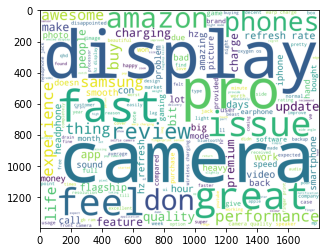

In [45]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)


In [47]:
# positive words # Choose the path for +ve words stored in system
with open("C:\Users\ali umar hasan\Desktop\data science\Text mining\Datasets NLP\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

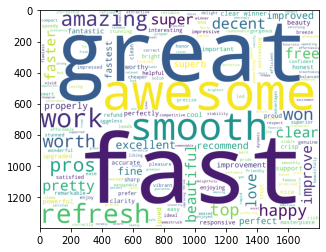

In [48]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

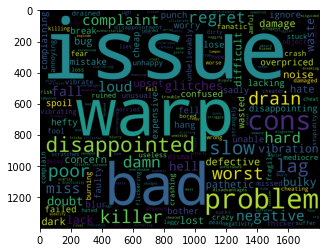

In [54]:
# negative words Choose path for -ve words stored in system
with open(r"C:\Users\ali umar hasan\Desktop\data science\Text mining\Datasets NLP\negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

In [55]:
# wordcloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

WNL = nltk.WordNetLemmatizer()

# Lowercase and tokenize
text = ip_rev_string.lower()

# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")


[nltk_data] Downloading package punkt to C:\Users\ali umar
[nltk_data]     hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [57]:
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

In [58]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great'] # If you want to remove any particular word form text which does not contribute much in meaning

In [60]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great'] # If you want to remove any particular word form text which does not contribute much in meaning
new_stopwords = stopwords_wc.union(customised_words)

In [62]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\ali umar
[nltk_data]     hasan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [63]:
# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [64]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

[('medium', 'loaded'), ('loaded', 'watch'), ('watch', 'video'), ('video', 'disappointed'), ('disappointed', 'waste'), ('waste', 'money'), ('money', 'pro'), ('pro', 'heavy'), ('heavy', 'weight'), ('weight', 'disply'), ('disply', 'gud'), ('gud', 'compare'), ('compare', 'samsung'), ('samsung', 'inbuilt'), ('inbuilt', 'guard'), ('guard', 'bubles'), ('bubles', 'youtube'), ('youtube', 'show'), ('show', 'wireless'), ('wireless', 'headphone'), ('headphone', 'axtra'), ('axtra', 'cover'), ('cover', 'recived'), ('recived', 'waste'), ('waste', 'money'), ('money', 'thing'), ('thing', 'happening'), ('happening', 'replaced'), ('replaced', 'feel'), ('feel', 'disappointed'), ('disappointed', 'worth'), ('worth', 'money'), ('money', 'hanging'), ('hanging', 'lot'), ('lot', 'application'), ('application', 'irritated'), ('irritated', 'make'), ('make', 'call'), ('call', 'wait'), ('wait', 'second'), ('second', 'closing'), ('closing', 'automatically'), ('automatically', 'showing'), ('showing', 'responding'), (

In [65]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_


{'medium loaded': 4928,
 'loaded watch': 4630,
 'watch video': 8576,
 'video disappointed': 8478,
 'disappointed waste': 2209,
 'waste money': 8567,
 'money pro': 5126,
 'pro heavy': 6191,
 'heavy weight': 3806,
 'weight disply': 8623,
 'disply gud': 2351,
 'gud compare': 3570,
 'compare samsung': 1637,
 'samsung inbuilt': 7042,
 'inbuilt guard': 4097,
 'guard bubles': 3566,
 'bubles youtube': 889,
 'youtube show': 8872,
 'show wireless': 7273,
 'wireless headphone': 8679,
 'headphone axtra': 3719,
 'axtra cover': 467,
 'cover recived': 1883,
 'recived waste': 6703,
 'money thing': 5133,
 'thing happening': 8032,
 'happening replaced': 3650,
 'replaced feel': 6815,
 'feel disappointed': 3065,
 'disappointed worth': 2211,
 'worth money': 8791,
 'money hanging': 5118,
 'hanging lot': 3640,
 'lot application': 4676,
 'application irritated': 296,
 'irritated make': 4228,
 'make call': 4785,
 'call wait': 1044,
 'wait second': 8538,
 'second closing': 7126,
 'closing automatically': 1558,


In [66]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('refresh rate', 36), ('hz refresh', 31), ('camera quality', 19), ('headphone jack', 18), ('warp charge', 16), ('wireless charging', 15), ('front camera', 14), ('hz display', 13), ('pop camera', 13), ('finger print', 13), ('gb ram', 12), ('fingerprint sensor', 12), ('selfie camera', 12), ('wide angle', 11), ('amoled display', 11), ('op pro', 11), ('warp charging', 11), ('night mode', 11), ('flagship killer', 10), ('ip rating', 10), ('build quality', 9), ('pro display', 9), ('low light', 9), ('sound quality', 9), ('mind blowing', 8), ('stereo speaker', 8), ('writing review', 8), ('top notch', 8), ('display hz', 8), ('warp charger', 8), ('dolby atmos', 8), ('fast charging', 8), ('software update', 8), ('mm jack', 8), ('buttery smooth', 7), ('blazing fast', 7), ('ram management', 7), ('fluid amoled', 7), ('heavy usage', 7), ('feel premium', 7), ('portrait mode', 7), ('type mm', 7), ('rear camera', 7), ('slow motion', 6), ('bluetooth earphone', 6), ('heating issue', 6), ('ram gb', 6), ('c

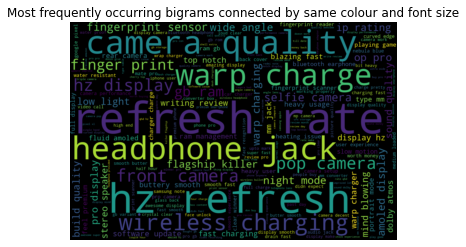

In [67]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
